In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove.stp_model import *

from sklearn.model_selection import KFold

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vkh5na7j because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f]
files = files[2:3]
files

['EXP0019_MS008_processed.csv']

# Function to make predictions on test data

In [3]:
def predict(self, x_test, t_eval, n_std=1., log=False):
    # check if precision has been computed

    # simulate
    output, G = self.runODEZ(t_eval, np.atleast_2d(x_test), self.params)

    # calculate covariance (dimension = [steps, n_out, n_out])
    COV = self.BetaInv + self.GAinvG(G, self.Ainv)

    # determine confidence interval for species
    stdv = np.sqrt(vmap(jnp.diag)(COV))

    return output, stdv

def predict_df(model, df, species):
    
    # save measured and predicted values
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # increase evaluation time
        t_eval = np.linspace(t_span[0], t_span[-1])

        # predict 
        Y_p, Y_std = predict(model, Y_m, t_eval)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)

        ### append only end-point prediction results for non-zero outcomes ###
        inds_pos = Y_m[-1,:] > 0 
        pred_species.append(np.array(species)[inds_pos])
        true.append(Y_m[-1,:][inds_pos])
        pred.append(Y_p[-1,:][inds_pos])
        stdv.append(Y_std[-1,:][inds_pos])
        
    # concatenate list
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return pred_species, true, pred, stdv

Total samples: 33, Updated regularization: 1.00e-03
Loss: 12.684, Residuals: 0.683
Loss: 8.953, Residuals: -0.246
Loss: 6.043, Residuals: -0.002
Loss: 4.061, Residuals: -0.012
Loss: 3.648, Residuals: -0.068
Loss: 3.176, Residuals: 0.043
Loss: 2.928, Residuals: 0.015
Loss: 2.594, Residuals: -0.022
Loss: 2.565, Residuals: 0.013
Loss: 2.339, Residuals: -0.007
Loss: 2.302, Residuals: -0.001
Loss: 2.237, Residuals: -0.013
Loss: 2.139, Residuals: -0.030
Loss: 2.123, Residuals: -0.021
Loss: 2.095, Residuals: -0.027
Loss: 2.047, Residuals: -0.033
Loss: 2.038, Residuals: -0.028
Loss: 2.027, Residuals: -0.032
Loss: 2.008, Residuals: -0.035
Loss: 2.007, Residuals: -0.030
Loss: 1.973, Residuals: -0.036
Loss: 1.967, Residuals: -0.035
Loss: 1.956, Residuals: -0.037
Loss: 1.946, Residuals: -0.038
Loss: 1.929, Residuals: -0.041
Evidence -234.929
Updating hyper-parameters...
Total samples: 33, Updated regularization: 2.70e-02
Loss: 10.069, Residuals: -0.028
Evidence 70.923
Updating hyper-parameters...


Loss: 8.604, Residuals: -0.019
Loss: 8.604, Residuals: -0.018
Loss: 8.603, Residuals: -0.018
Loss: 8.602, Residuals: -0.017
Loss: 8.602, Residuals: -0.017
Loss: 8.602, Residuals: -0.017
Loss: 8.602, Residuals: -0.017
Loss: 8.602, Residuals: -0.016
Loss: 8.602, Residuals: -0.016
Loss: 8.602, Residuals: -0.016
Loss: 8.602, Residuals: -0.016
Loss: 8.602, Residuals: -0.016
Evidence 13.992
Updating hyper-parameters...
Total samples: 33, Updated regularization: 3.43e-01
Loss: 26.521, Residuals: 0.030
Loss: 26.220, Residuals: 0.052
Loss: 25.987, Residuals: 0.049
Loss: 25.960, Residuals: 0.048
Loss: 25.919, Residuals: 0.050
Loss: 25.870, Residuals: 0.051
Loss: 25.825, Residuals: 0.052
Loss: 25.820, Residuals: 0.055
Loss: 25.812, Residuals: 0.055
Loss: 25.801, Residuals: 0.055
Loss: 25.800, Residuals: 0.057
Loss: 25.794, Residuals: 0.057
Loss: 25.793, Residuals: 0.057
Loss: 25.790, Residuals: 0.057
Loss: 25.789, Residuals: 0.058
Loss: 25.789, Residuals: 0.058
Loss: 25.788, Residuals: 0.058
Loss

Loss: 8.564, Residuals: 0.134
Loss: 8.440, Residuals: 0.153
Loss: 8.429, Residuals: 0.155
Loss: 8.408, Residuals: 0.155
Loss: 8.375, Residuals: 0.153
Loss: 8.369, Residuals: 0.156
Loss: 8.358, Residuals: 0.155
Loss: 8.342, Residuals: 0.151
Loss: 8.341, Residuals: 0.152
Loss: 8.339, Residuals: 0.152
Loss: 8.339, Residuals: 0.152
Loss: 8.337, Residuals: 0.151
Loss: 8.334, Residuals: 0.149
Loss: 8.334, Residuals: 0.150
Loss: 8.333, Residuals: 0.149
Loss: 8.332, Residuals: 0.149
Loss: 8.331, Residuals: 0.148
Loss: 8.331, Residuals: 0.148
Loss: 8.331, Residuals: 0.148
Loss: 8.330, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Loss: 8.329, Residuals: 0.148
Evidence 35.759
Updating hyper-parameter

Loss: 115.240, Residuals: 0.040
Loss: 115.239, Residuals: 0.040
Loss: 115.239, Residuals: 0.040
Loss: 115.238, Residuals: 0.040
Loss: 115.238, Residuals: 0.040
Evidence 377.994
Updating hyper-parameters...
Total samples: 30, Updated regularization: 4.79e-01
Loss: 116.770, Residuals: 0.039
Loss: 116.723, Residuals: 0.039
Loss: 116.710, Residuals: 0.038
Loss: 116.706, Residuals: 0.038
Loss: 116.704, Residuals: 0.038
Loss: 116.698, Residuals: 0.038
Loss: 116.689, Residuals: 0.038
Loss: 116.689, Residuals: 0.038
Loss: 116.683, Residuals: 0.038
Loss: 116.683, Residuals: 0.038
Loss: 116.681, Residuals: 0.038
Loss: 116.679, Residuals: 0.038
Loss: 116.679, Residuals: 0.038
Loss: 116.677, Residuals: 0.038
Loss: 116.677, Residuals: 0.038
Loss: 116.676, Residuals: 0.038
Loss: 116.676, Residuals: 0.038
Loss: 116.676, Residuals: 0.038
Evidence 378.916
Updating hyper-parameters...
Total samples: 30, Updated regularization: 4.74e-01
Loss: 117.505, Residuals: 0.037
Loss: 117.475, Residuals: 0.037
Loss

Loss: 133.211, Residuals: 0.009
Loss: 133.210, Residuals: 0.009
Loss: 133.208, Residuals: 0.009
Loss: 133.206, Residuals: 0.009
Loss: 133.206, Residuals: 0.009
Loss: 133.206, Residuals: 0.009
Evidence 461.229
Updating hyper-parameters...
Total samples: 35, Updated regularization: 9.65e-01
Loss: 134.666, Residuals: 0.010
Loss: 134.643, Residuals: 0.008
Loss: 134.609, Residuals: 0.007
Loss: 134.597, Residuals: 0.006
Loss: 134.586, Residuals: 0.006
Loss: 134.585, Residuals: 0.006
Loss: 134.585, Residuals: 0.006
Loss: 134.584, Residuals: 0.006
Loss: 134.583, Residuals: 0.006
Loss: 134.582, Residuals: 0.006
Loss: 134.582, Residuals: 0.006
Evidence 462.326
Updating hyper-parameters...
Total samples: 35, Updated regularization: 9.63e-01
Loss: 135.488, Residuals: 0.006
Loss: 135.476, Residuals: 0.005
Loss: 135.460, Residuals: 0.004
Loss: 135.452, Residuals: 0.004
Loss: 135.452, Residuals: 0.004
Loss: 135.449, Residuals: 0.004
Loss: 135.446, Residuals: 0.004
Loss: 135.446, Residuals: 0.004
Loss

Loss: 130.213, Residuals: 0.020
Loss: 130.208, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Loss: 130.207, Residuals: 0.020
Evidence 410.664
Updating hyper-parameters...
Total samples: 33, Updated regularization: 8.86e-01
Loss: 130.714, Residuals: 0.020
Loss: 130.710, Residuals: 0.019
Loss: 130.705, Residuals: 0.020
Loss: 130.702, Residuals: 0.019
Loss: 130.702, Residuals: 0.019
Loss: 130.702, Residuals: 0.019
Loss: 130.702, Residuals: 0.019
Loss: 130.702, Residuals: 0.019
Evidence 411.181
Updating hyper-parameters...
Total samples: 33, Updated regularization: 8.89e-01
Loss: 131.006, Residuals: 0.020
Loss: 131.004, Residuals: 0.019
Loss: 131.001, Residuals: 0.019
Loss: 131.001, Residuals: 0.019
Loss: 131.000, Residuals: 0.019
Loss: 131.000, Residuals: 0.019
Loss

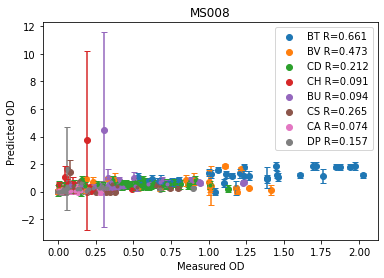

In [4]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    # mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=5, shuffle=True, random_state=21)

    # keep track of all predictions
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    # train_index, test_index = next(iter(kf.split(dfs)))
    for train_index, test_index in kf.split(dfs):

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        # train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = gLV(species, train_df)

        # fit to data 
        model.fit() 

        # plot fitness to data
        pred_species, true, pred, stdv = predict_df(model, test_df, species)

        # append predictions 
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

    # save prediction results to a .csv
    strain = file.split("_")[1]
    kfold_df = pd.DataFrame()
    kfold_df['species'] = all_pred_species
    kfold_df['true'] = all_true
    kfold_df['pred'] = all_pred
    kfold_df['stdv'] = all_stdv
    kfold_df.to_csv(f"kfold/{strain}_kfold.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"kfold/{strain}_kfold.pdf", dpi=300)
    plt.show()

In [5]:
# for file in files:
#     strain = file.split("_")[1]
#     kfold_df = pd.read_csv(f"kfold/{strain}_kfold.csv")
        
#     all_pred_species = kfold_df['species'].values
#     all_true = kfold_df['true'].values 
#     all_pred = kfold_df['pred'].values
#     all_stdv = kfold_df['stdv'].values
        
#     R_overall = linregress(all_true, all_pred).rvalue
        
#     # show prediction performance of individual species
#     for sp in species:
#         sp_inds = all_pred_species == sp
#         R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
#         plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
#         plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
#                      fmt='.', capsize=3)

#     plt.xlabel("Measured OD")
#     plt.ylabel("Predicted OD")
#     plt.legend()
#     plt.title(strain + " R={:.2f}".format(R_overall))
#     plt.show()

# Show fit

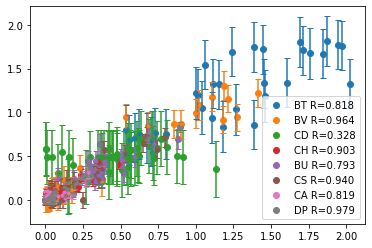

In [6]:
pred_species, true, pred, stdv = predict_df(model, train_df, species)

for sp in species:
    sp_inds = pred_species == sp
    if sum(true[sp_inds]) > 0:
        R = linregress(true[sp_inds], pred[sp_inds]).rvalue
        plt.scatter(true[sp_inds], pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(true[sp_inds], pred[sp_inds], yerr= stdv[sp_inds], 
                     fmt='.', capsize=3)
plt.legend()
plt.show()

In [7]:
def plot(model, df):

    # pull just the community data
    test_data = process_df(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # increase evaluation time
        t_eval = np.linspace(t_span[0], t_span[-1])

        # predict 
        pred, stdv = predict(model, Y_m, t_eval)

        plt.figure(figsize=(9, 6))
        for i, s in enumerate(species):
            if Y_m[0,i] > 0:
                plt.scatter(t_span, Y_m[:,i], label="True species " + s, color='C{}'.format(i), marker='o', s=75)
                plt.plot(t_eval, pred[:,i], label="Predicted species " + s, color='C{}'.format(i))
                plt.fill_between(t_eval, pred[:,i]-stdv[:,i], pred[:,i]+stdv[:,i], color='C{}'.format(i), alpha=0.2)

        plt.legend()
        plt.xlabel("Time", fontsize=16)
        plt.ylabel("Abundance", fontsize=16)
        exp_name, passage_num, ti = exp.split("_")
        plt.title(f"{exp_name} passage {passage_num} predictions")
        plt.savefig(f"figures/{exp}.png")
        plt.show()

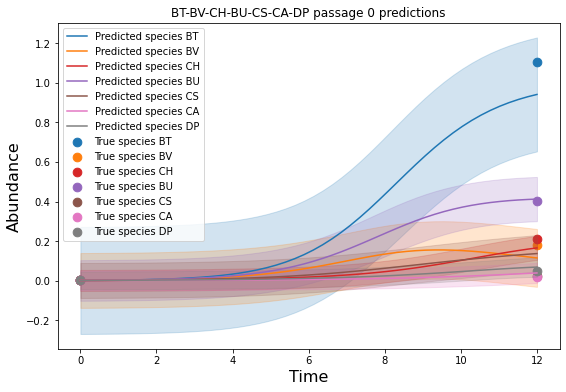

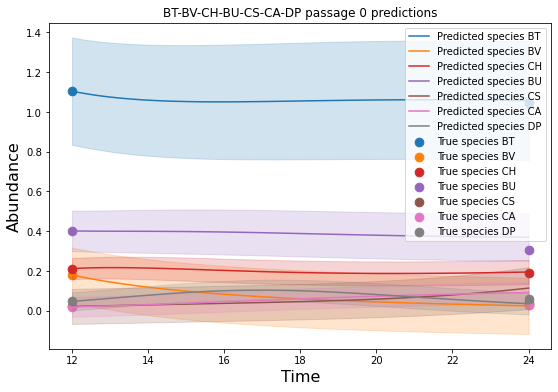

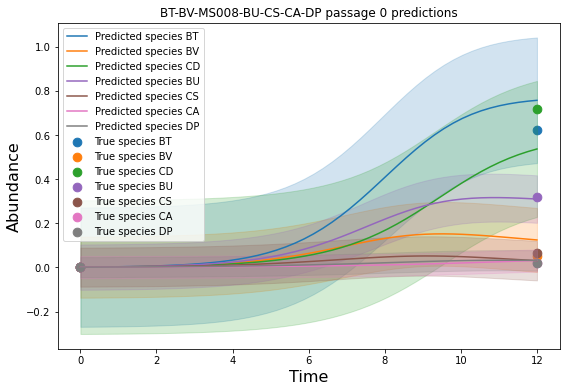

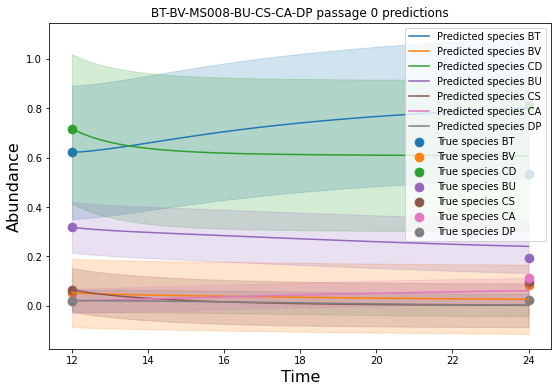

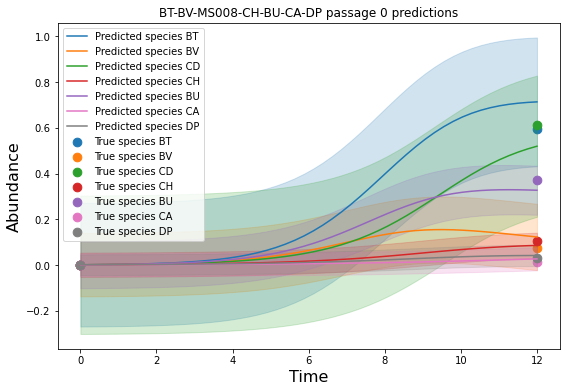

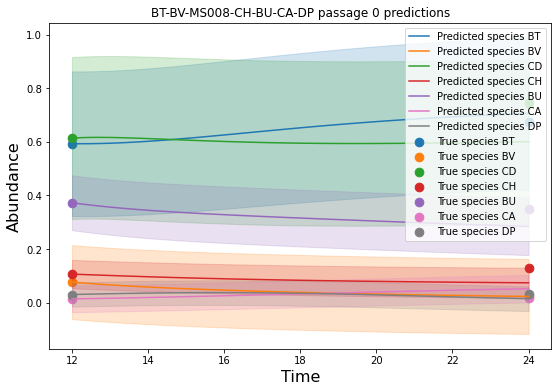

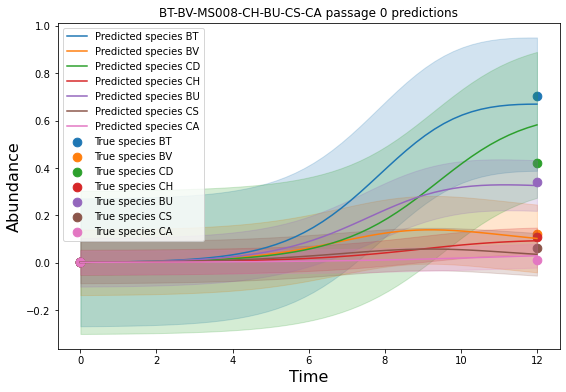

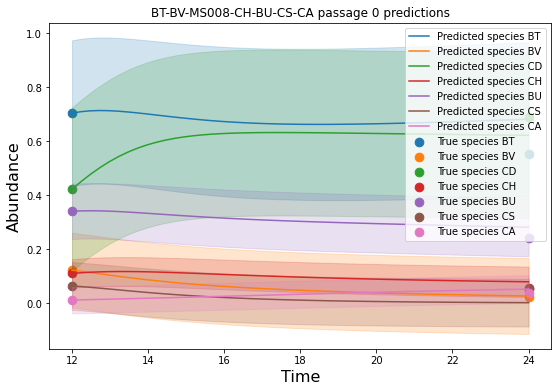

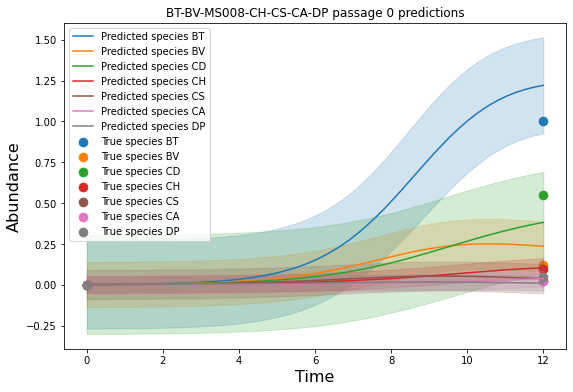

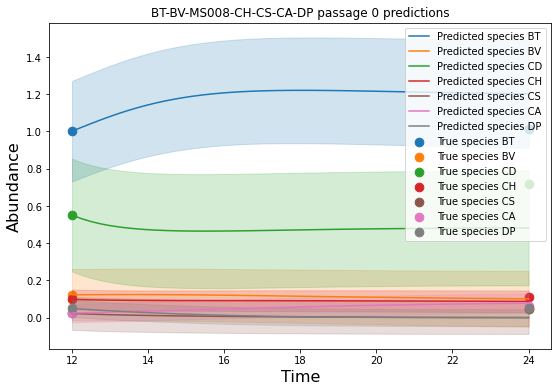

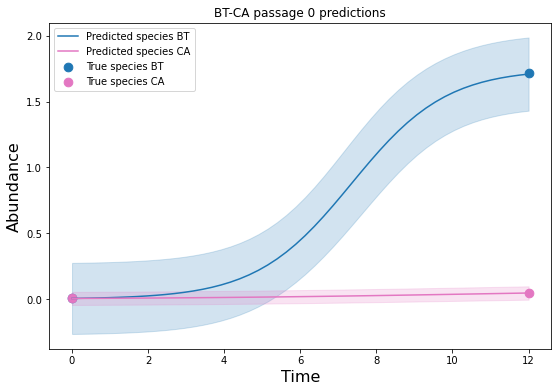

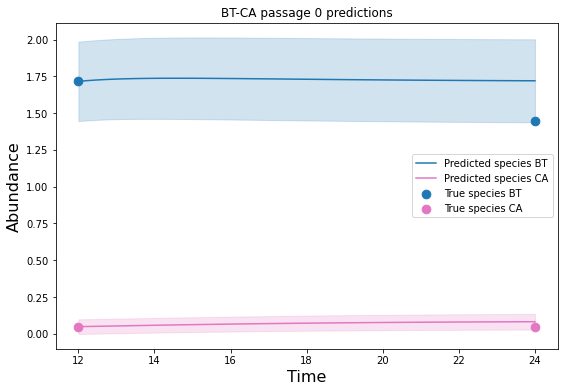

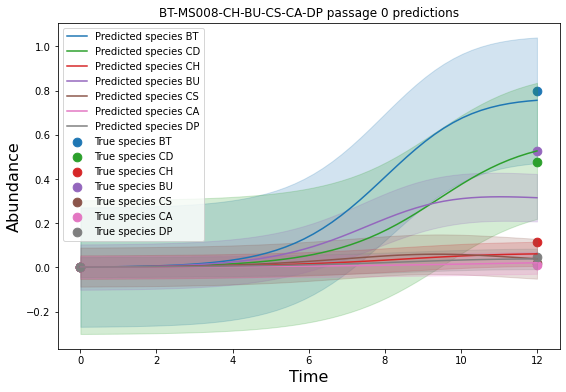

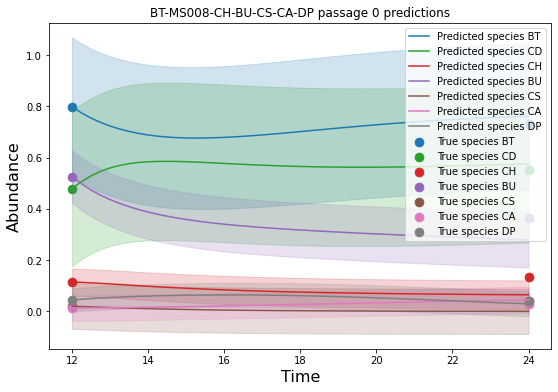

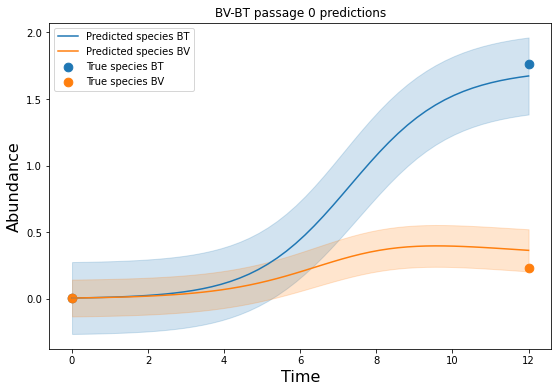

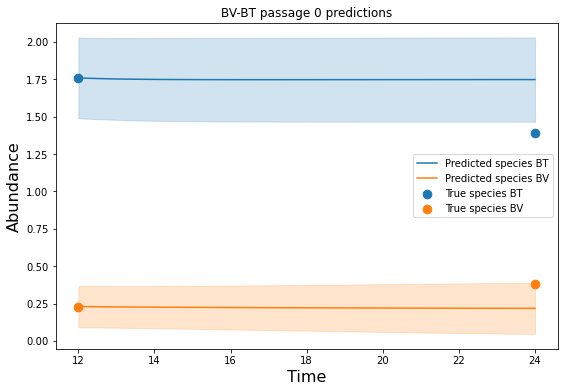

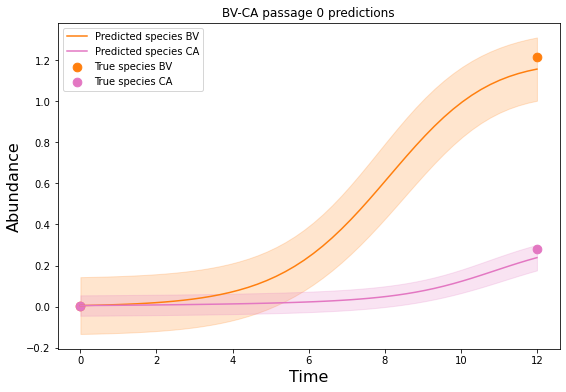

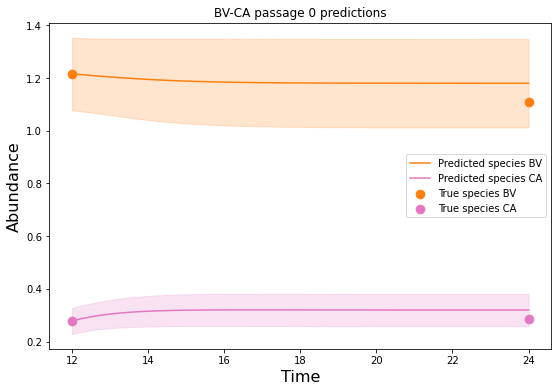

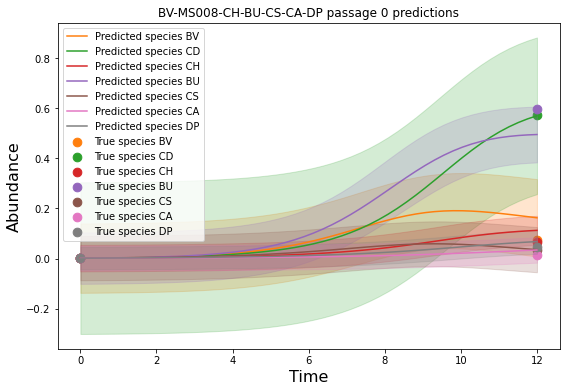

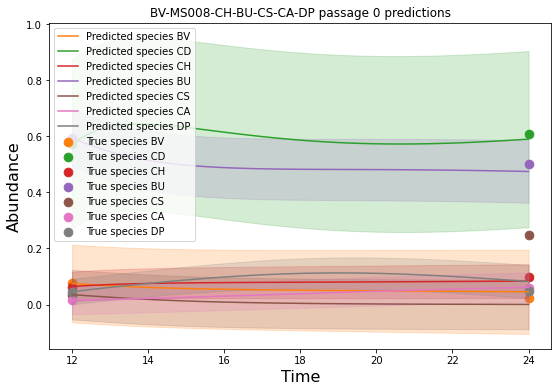

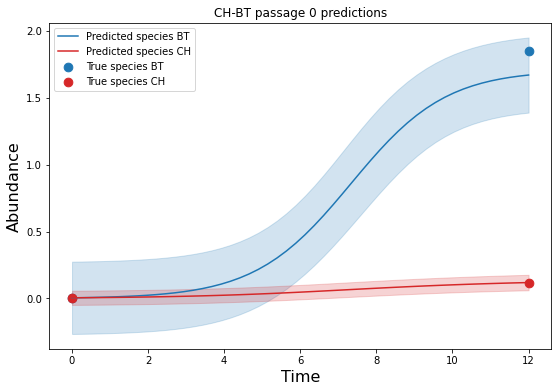

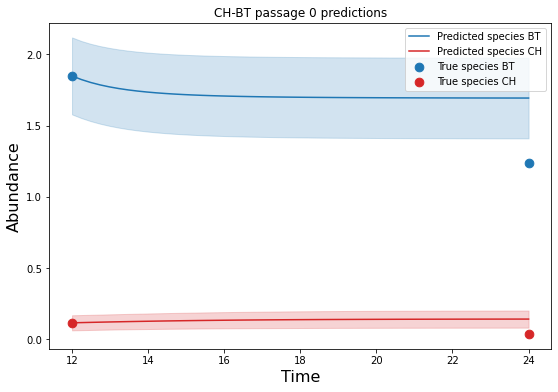

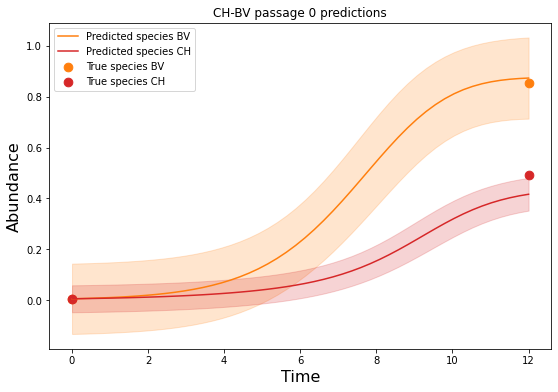

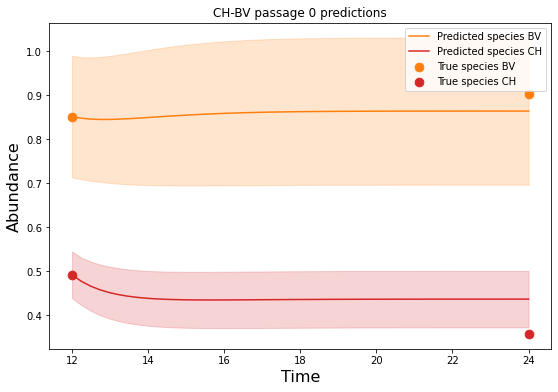

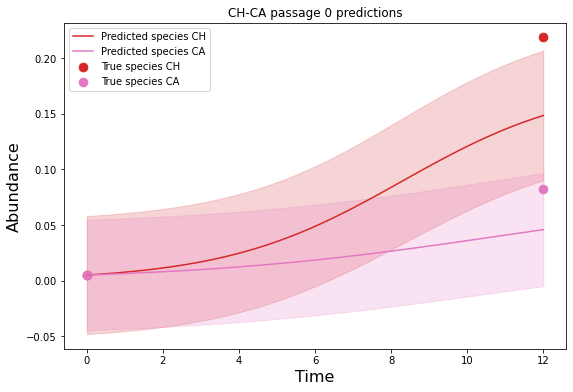

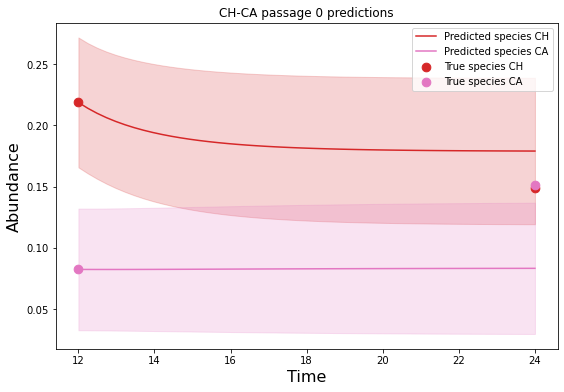

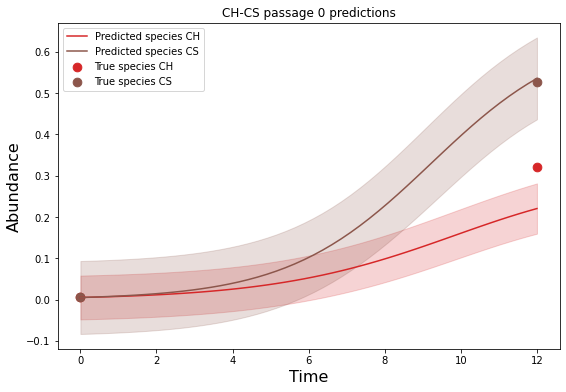

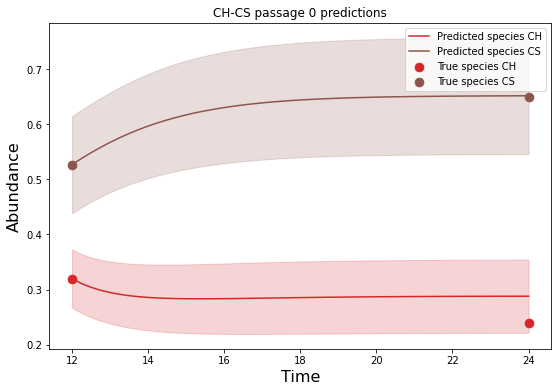

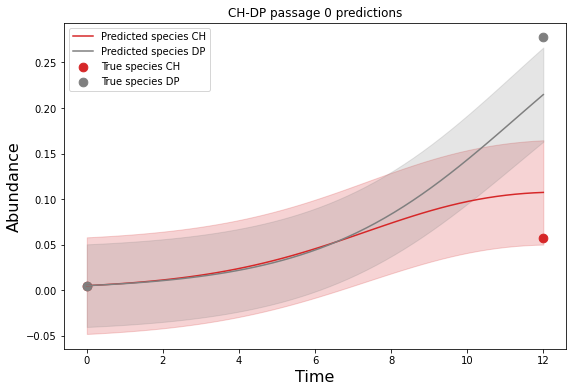

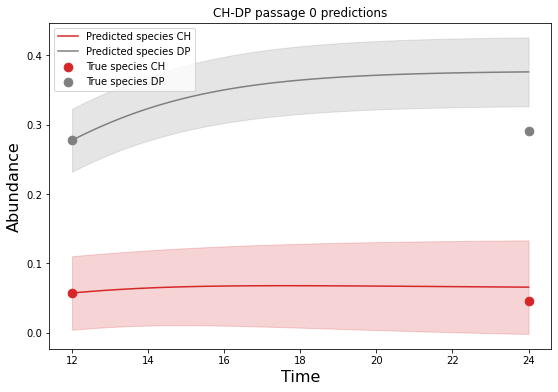

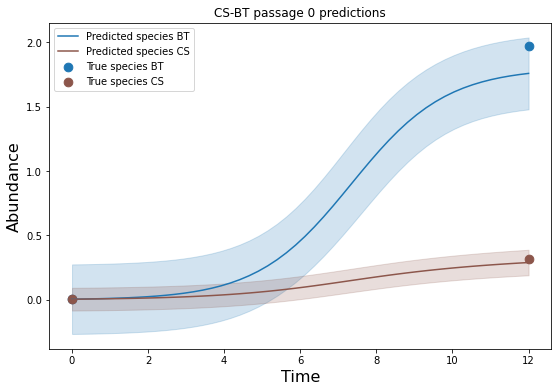

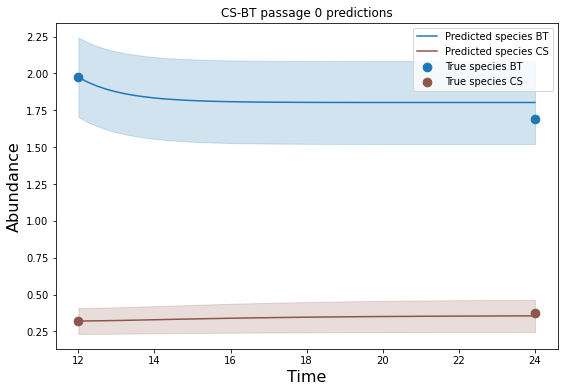

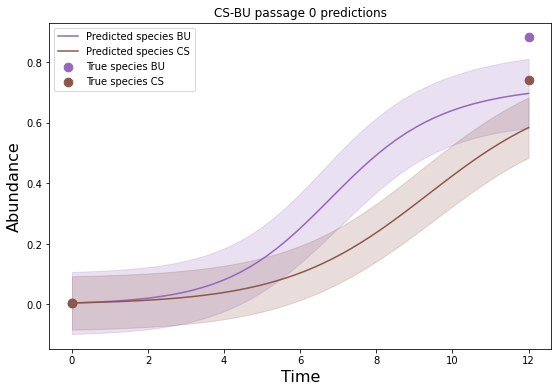

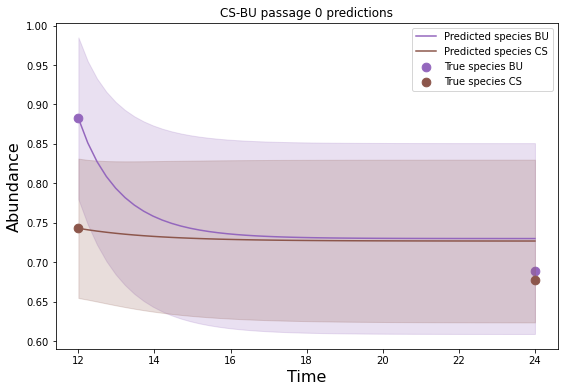

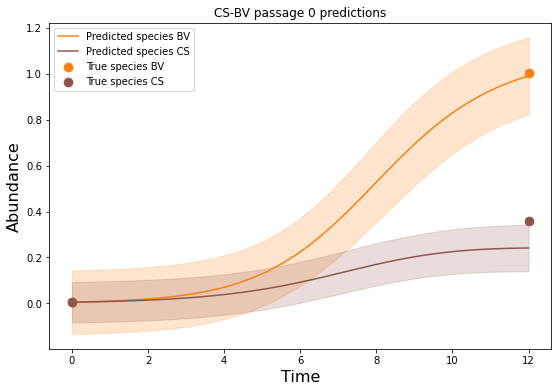

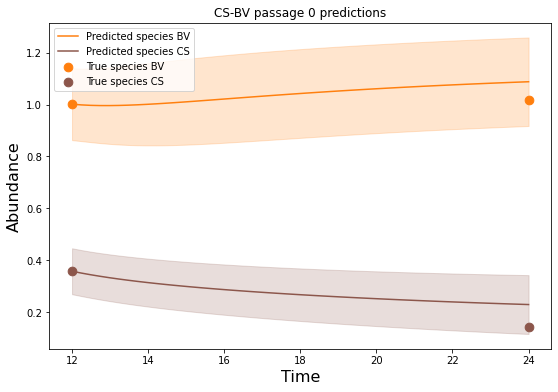

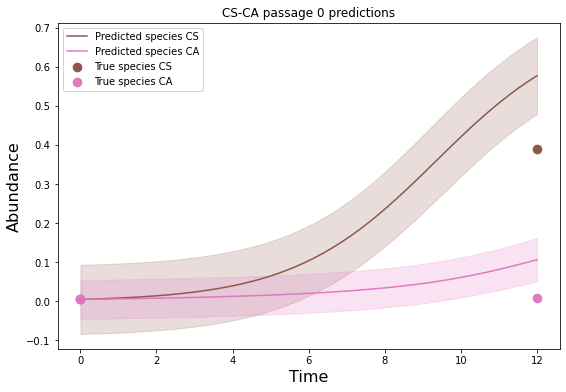

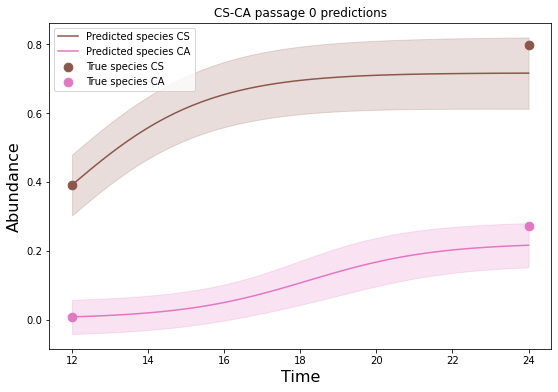

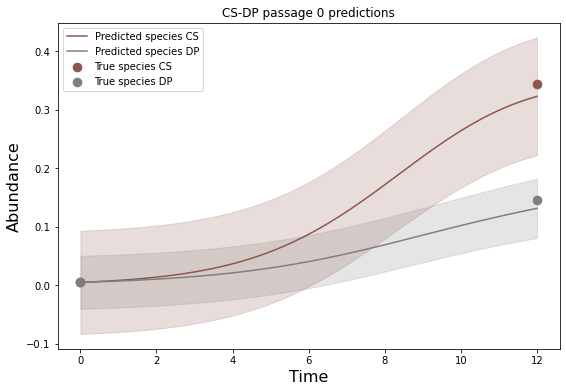

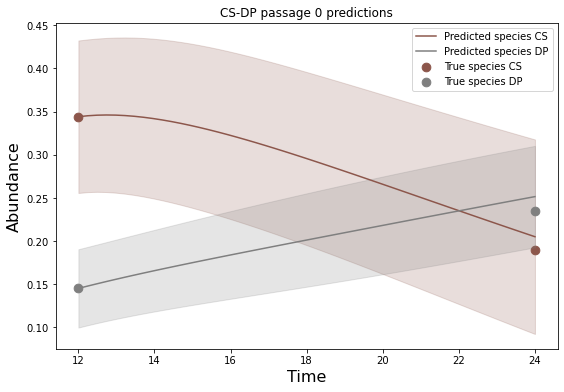

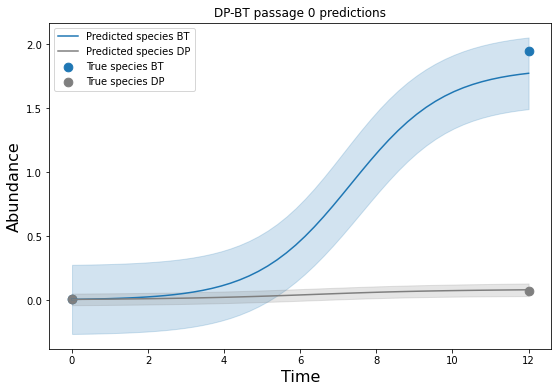

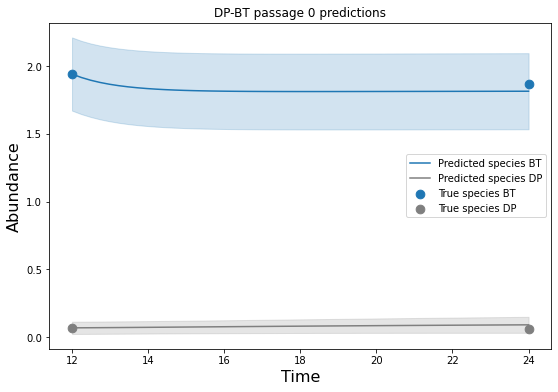

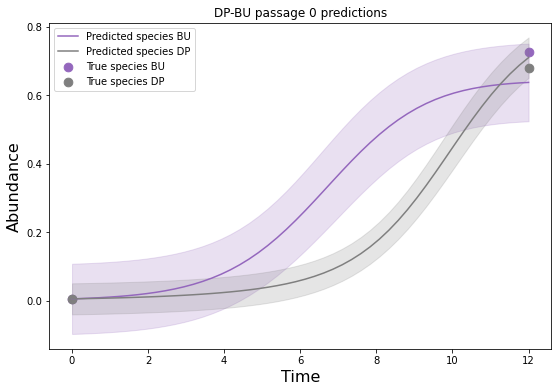

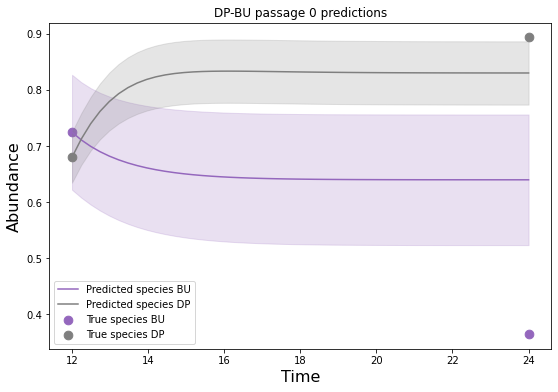

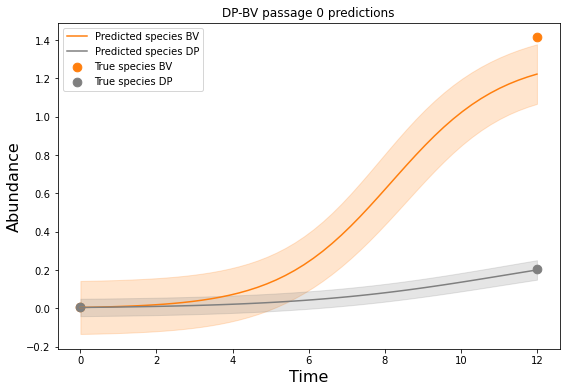

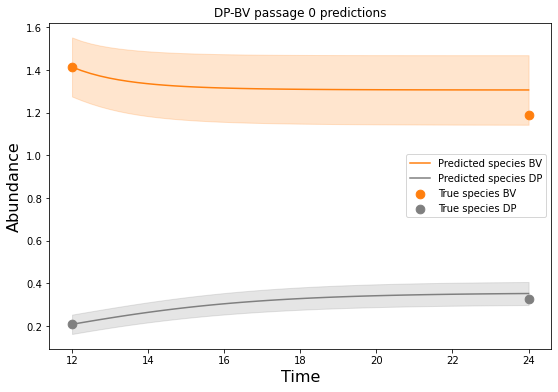

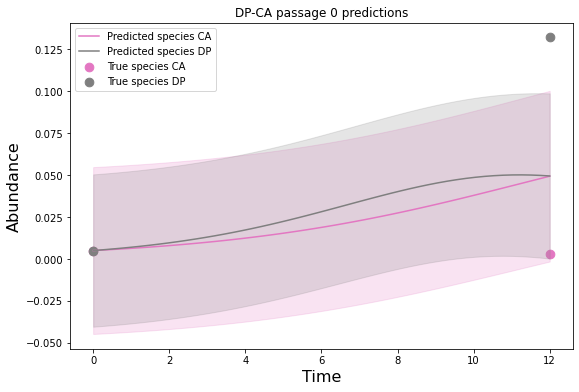

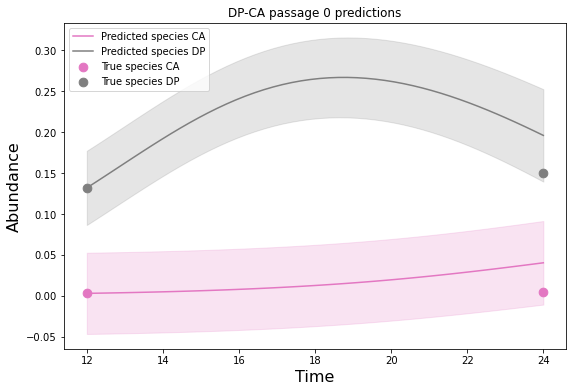

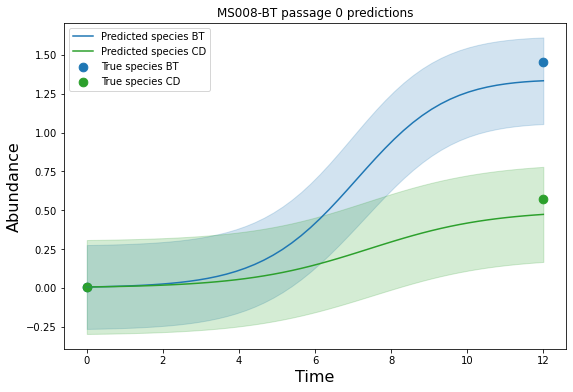

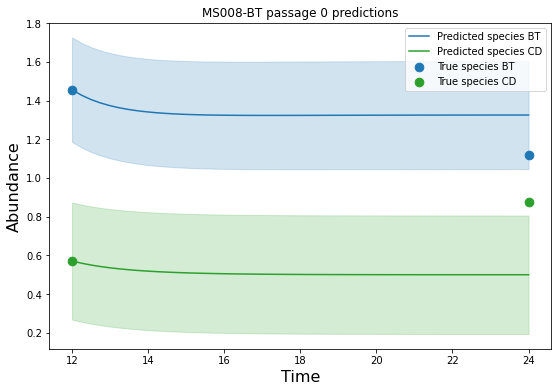

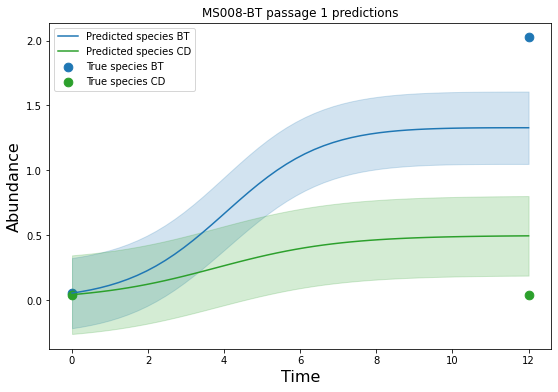

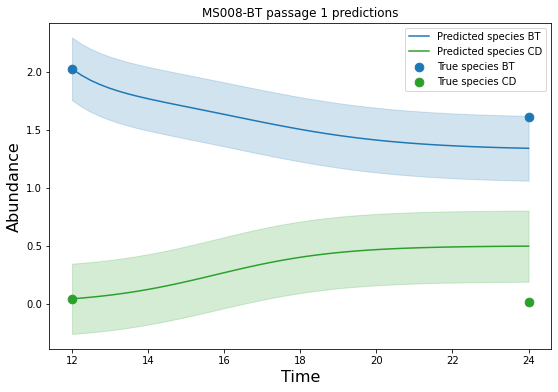

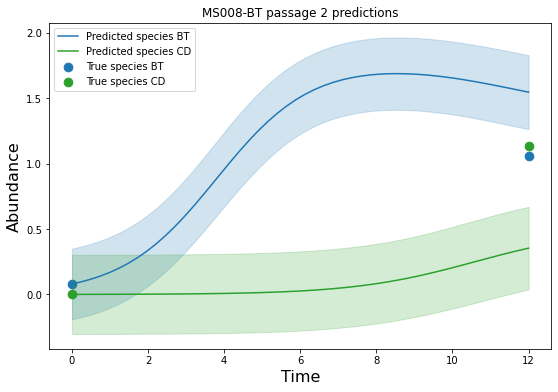

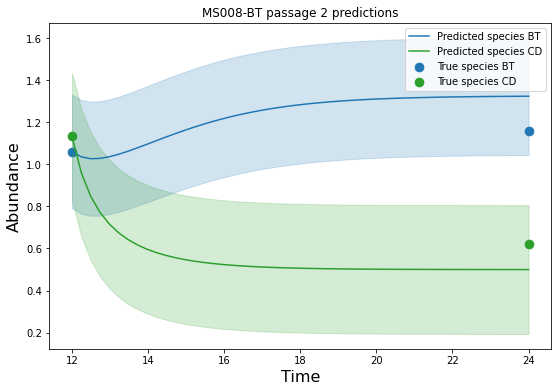

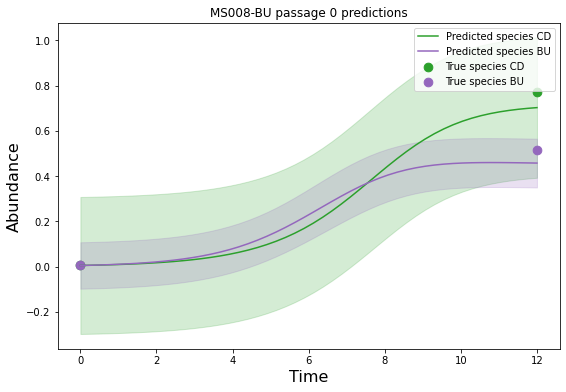

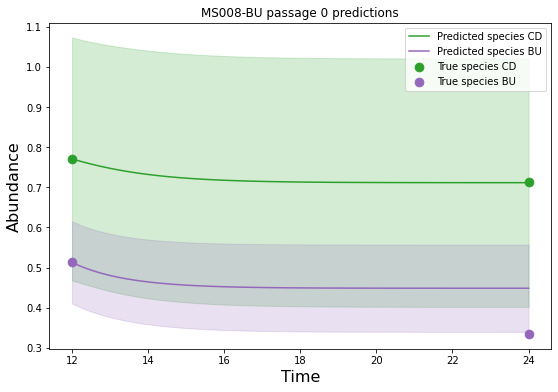

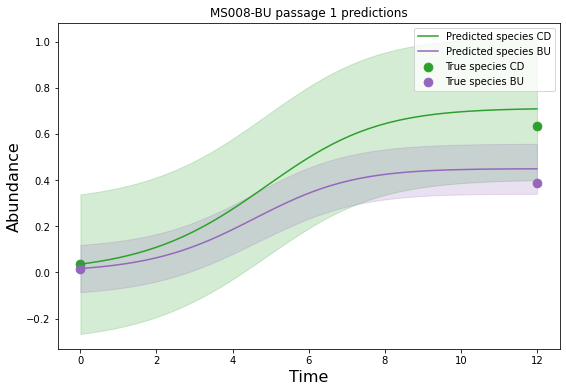

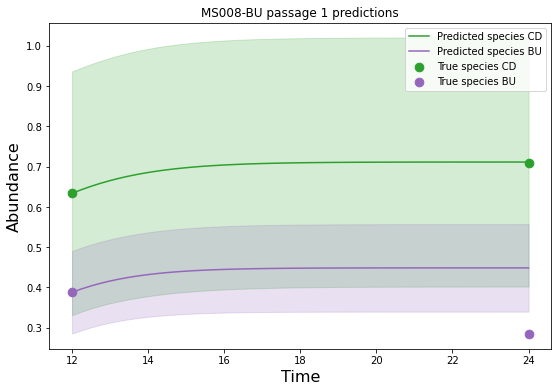

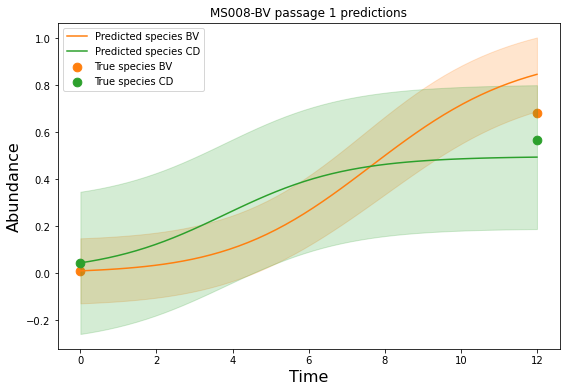

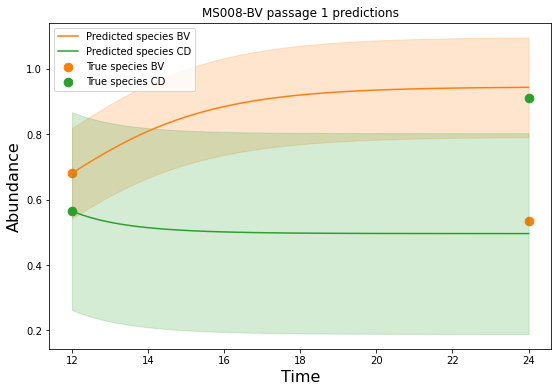

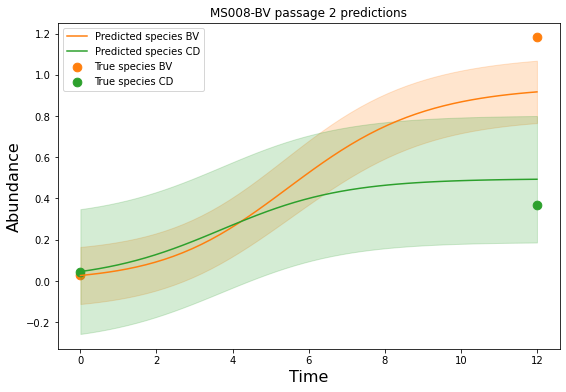

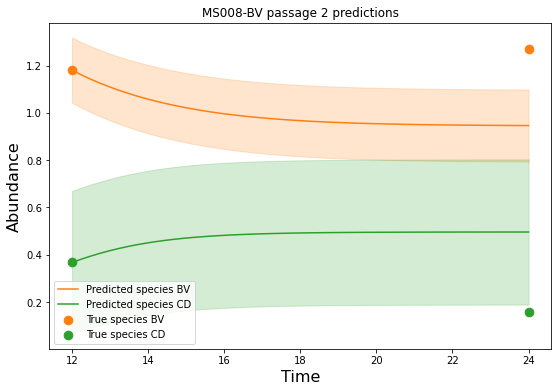

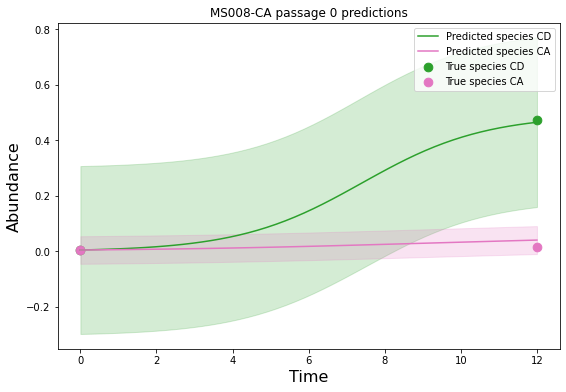

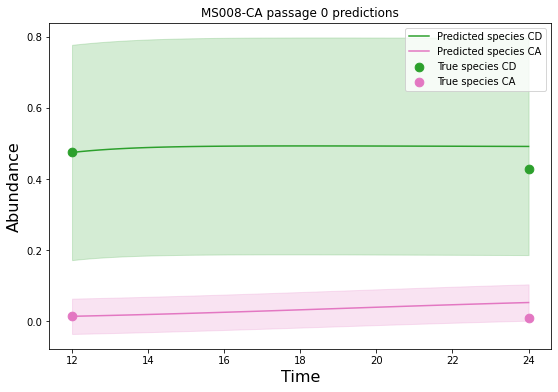

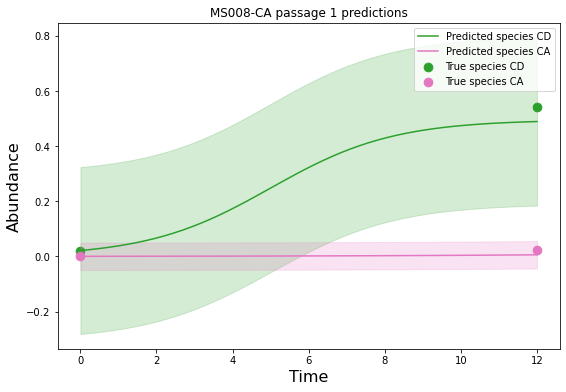

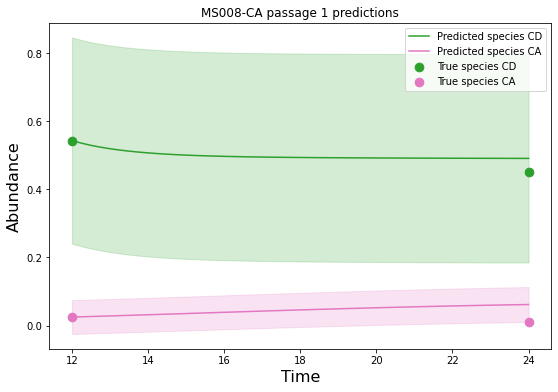

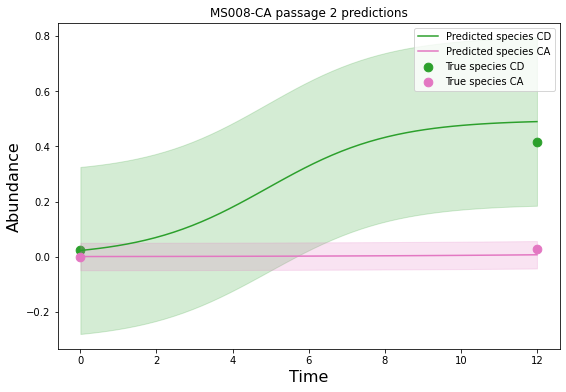

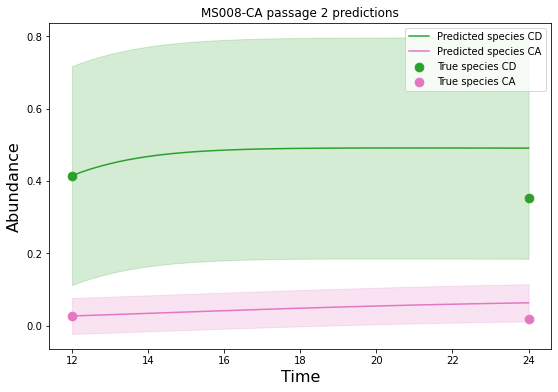

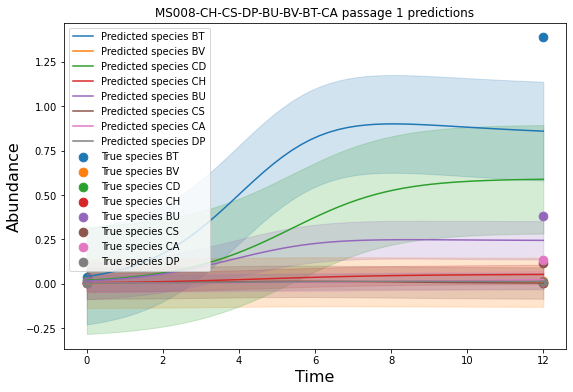

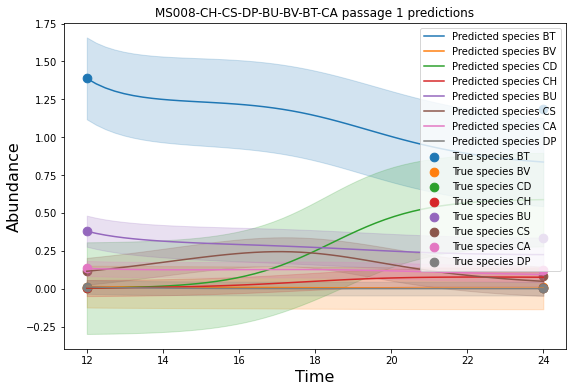

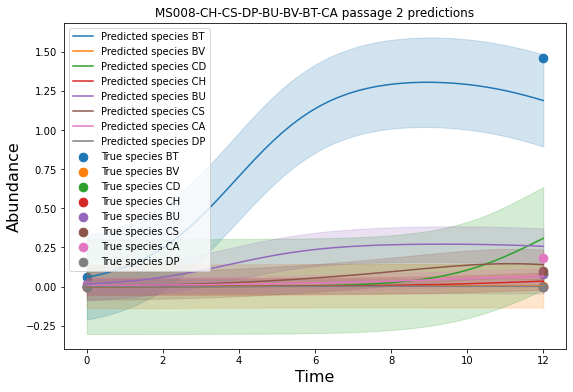

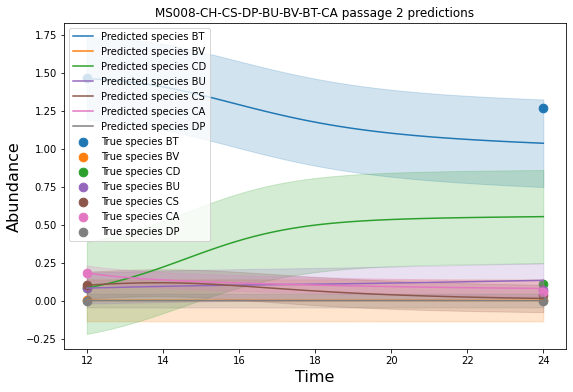

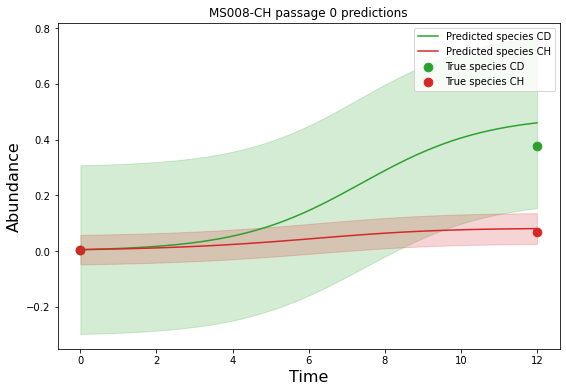

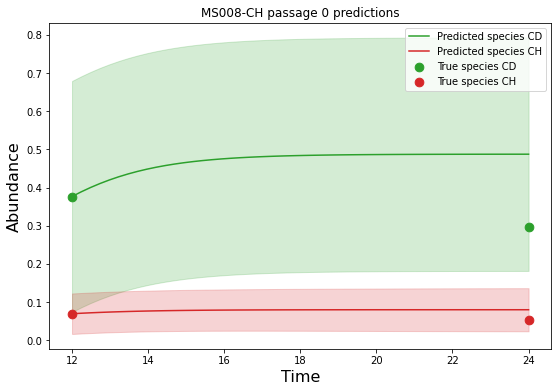

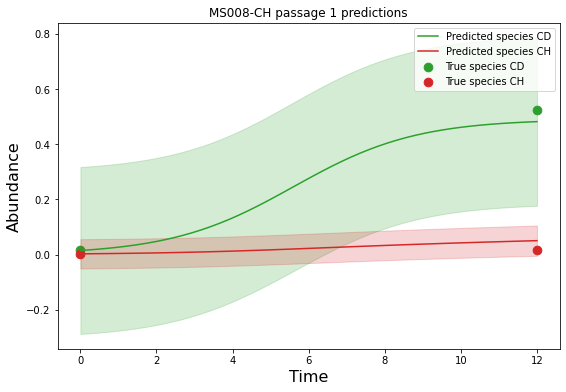

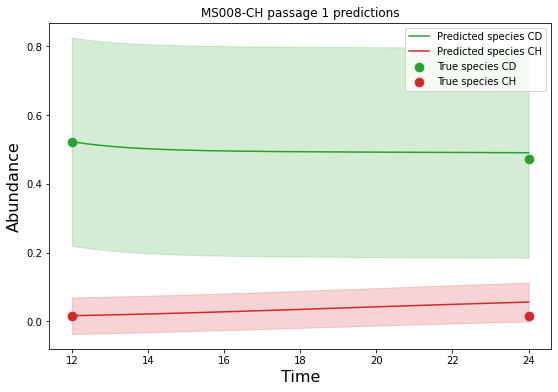

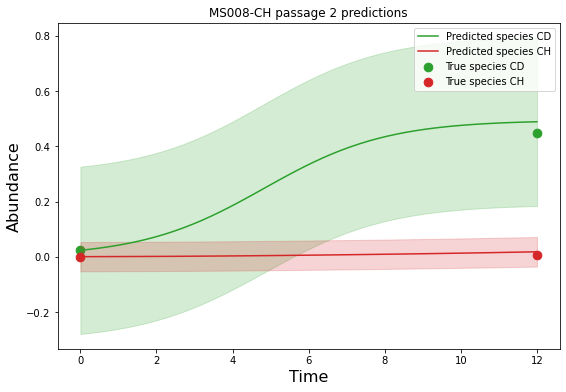

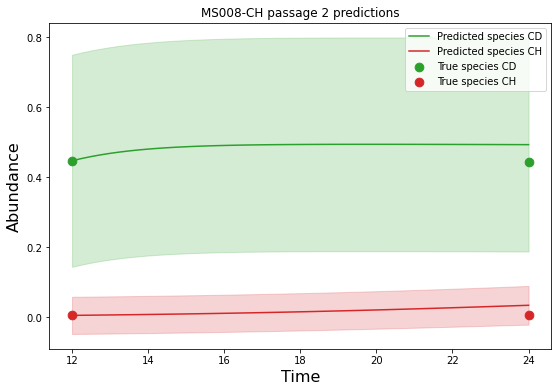

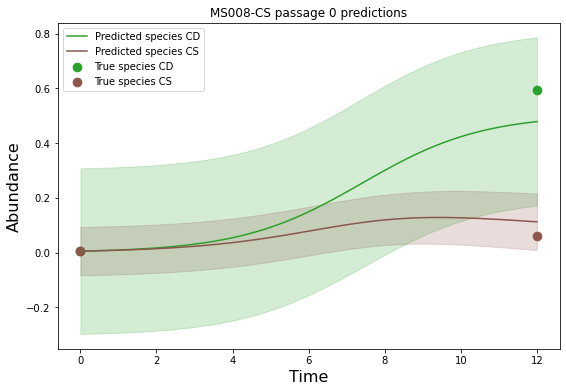

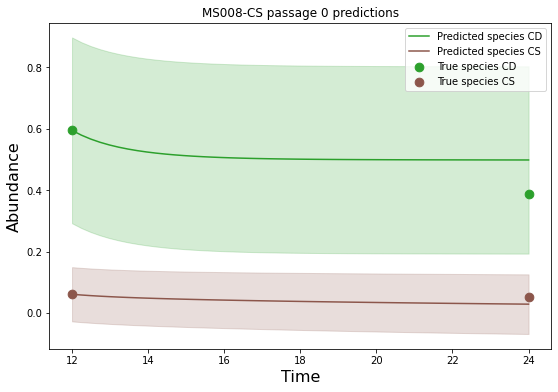

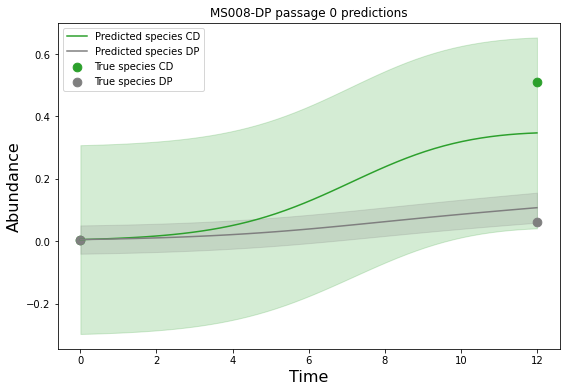

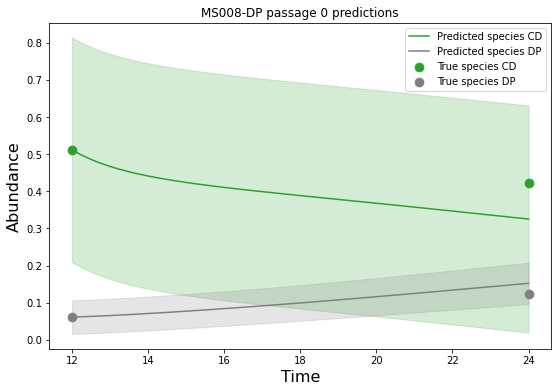

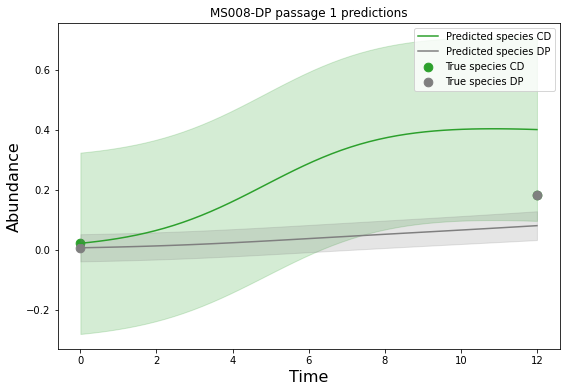

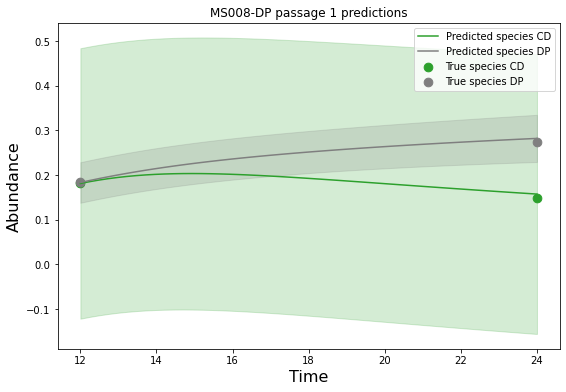

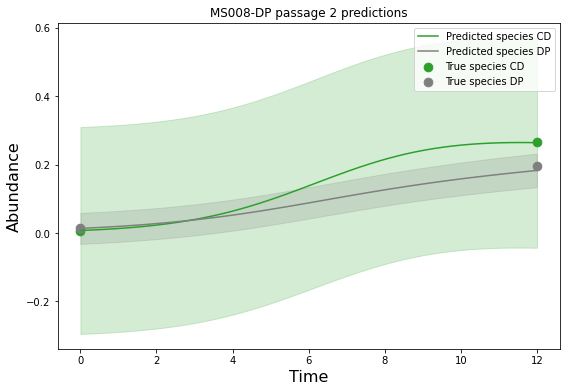

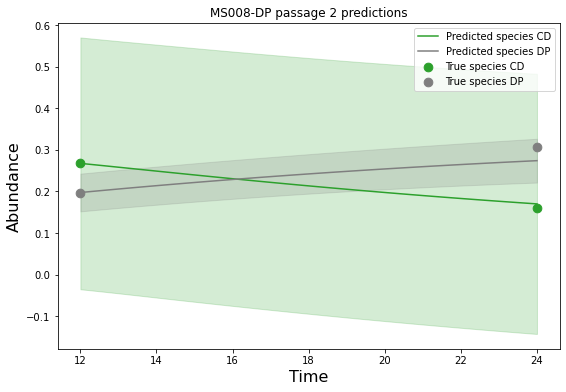

In [8]:
plot(model, train_df)